# Conditional Graph
The purpose of this exercise is to build a state machine with a conditional execution flow. That is, with multiple paths that can be executed based on the computation on a previous node.   
- To achieve this we will create a router node to handle the decision making and control the graph flow.
- This is done via add_conditional_edges() function in LangGraph.
- We will also show an alternative way of marking the START and END nodes.
   
Challenge: Implement a state machine in LangGraph that can add or subtract two given numbers based on the operator passed, "+" or "-" respectively.

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
# Our state
class AgentState(TypedDict):
    number1: int
    number2: int
    operator: str
    result: int

In [10]:
# Our functional nodes
def adder(state: AgentState) -> AgentState:
    """
    This node adds two numbers
    """
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """
    This node subtracts number2 from number1
    """
    state['result'] = state['number1'] - state['number2']
    return state

In [ ]:
# Now our router node
def router(state: AgentState) -> str:
    """ExerExEEEEEEEsdfsdfsdefsdfsdfsdfsdfgcfrgt sdfsdf
    dfs
    This node selects the next node that should be executed based on the operator given
    """
    # Note that we return the !!edge name!!
    if state['operator'] == "+":
        return "addition"
    elif state['operator'] == "-":
        return "subtraction"
    else:
        raise Exception(f"Invalid operator: {state['operator']}")

In [12]:
graph = StateGraph(AgentState)
graph.add_node(adder.__name__, adder)
graph.add_node(subtractor.__name__, subtractor)
# Passthrough node - We use this node to pass the state to the logic in the conditional edge that can make an execution flow decision
graph.add_node(router.__name__, lambda state: state)

# Our starting point has to be this passthrough node
graph.add_edge(START, router.__name__)

# Then we add the conditional edge. Conditions are defined in the third parameter as 
graph.add_conditional_edges(
    router.__name__, # From passthrough node
    router, # Logic to decide execution flow
    {
        "addition": adder.__name__, # To adder() if operator == "+"
        "subtraction": subtractor.__name__ # To subtractor if operator == "-"
    }
)

# And connect our adder and subtractor as exit points
graph.add_edge(adder.__name__, END)
graph.add_edge(subtractor.__name__, END)

app = graph.compile()

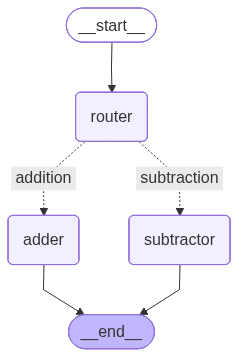

In [13]:
# Now let's visualise this graph
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
# Now let's run this state machine with different inputs
initial_state_addition: AgentState = {
    'number1': 3,
    'number2': 5,
    'operator': "+"
}
final_state_addition: AgentState = app.invoke(initial_state_addition)
print(f"Result Addition: {final_state_addition['number1']} {final_state_addition['operator']} {final_state_addition['number2']} = {final_state_addition['result']}")
initial_state_subtraction: AgentState = {
    'number1': 3,
    'number2': 5,
    'operator': "-"
}
final_state_subtraction: AgentState = app.invoke(initial_state_subtraction)
print(f"Result Subtraction: {final_state_subtraction['number1']} {final_state_subtraction['operator']} {final_state_subtraction['number2']} = {final_state_subtraction['result']}")

Result Addition: 3 + 5 = 8
Result Subtraction: 3 - 5 = -2
